In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data from the “train.csv” file into a DataFrame.
df= pd.read_csv(r'C:\Users\nickm\Documents\train.csv')

In [4]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace)

fill_na_median(df['Age'])


In [5]:
# check the result
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
# fill with the most represented value
def fill_na_most(df, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])


In [8]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# log-transformation
def log_transformation(df):
    return df.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


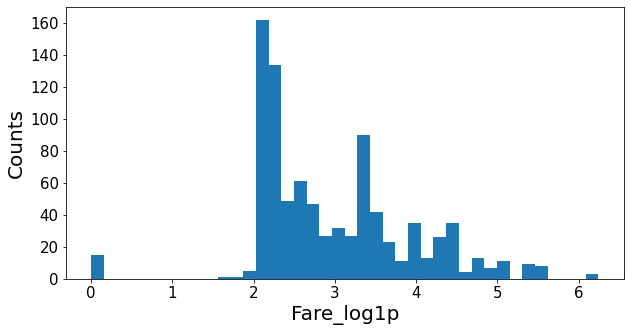

In [12]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()


In [14]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head(8)


,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1
